### 예측

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [2]:
plt.rcParams['font.family']='HYGPRM'

In [3]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")
df10=pd.read_csv("MetroData/september.csv")

In [4]:
pd.options.display.float_format = '{:.5f}'.format

### 요일별 승차, 하차, 총 승객 합

In [5]:
week_sum=df9.groupby(["요일"]).sum()
week_sum

,승차승객,하차승객,총 승객,승차-하차,월,일
요일,,,,,,
금,237128298,236361617,473489915,766681,93359,310896
목,226354663,225657102,452011765,697561,92107,327020
수,227813968,227109211,454923179,704757,96923,325423
월,219967470,219278743,439246213,688727,95126,337360
일,124605057,123887691,248492748,717366,94361,334457
토,168638012,167836285,336474297,801727,93911,331792
화,228131044,227422176,455553220,708868,96287,322957


### 월별 승차, 하차, 총 승객 합

In [6]:
month_sum=df9.groupby(["월"]).sum()
month_sum

,승차승객,하차승객,총 승객,승차-하차,일
월,,,,,
1,167802022,167210066,335012088,591956,296171
2,142341031,141871343,284212374,469688,242392
3,163467773,162929899,326397672,537874,295274
4,184200435,183519579,367720014,680856,276574
5,203411199,202737710,406148909,673489,296541
6,191408080,190698164,382106244,709916,281742
7,193573962,192844478,386418440,729484,300544
8,186434010,185741586,372175596,692424,300667


### 자료 수정
 - 요일, 노선을 int형으로 변환
 - 날짜, 역 삭제

In [7]:
week_mapping={"월":0, "화":1, "수":2, "목":3, "금":4, "토":5, "일":6}

In [8]:
line_mapping={"1호선":0, "2호선":1, "3호선":2, "4호선":3, "5호선":4, "6호선":5, "7호선":6, "8호선":7, "9호선":8, "9호선2~3단계":9, "경강선":10, "경부선":11, "경원선":12, 
              "경의선":13, "경인선":14, "경춘선":15, "공항철도 1호선":16, "과천선":17, "분당선":18, "수인선":19, "신림선":20, "안산선":21, "우이신설선":22,
              "일산선":23, "장항선":24, "중앙선":25}

In [9]:
df9["요일"]=df9["요일"].map(week_mapping)

In [10]:
df9["노선"]=df9["노선"].map(line_mapping)

In [11]:
df9=df9.drop(["날짜", "역"], axis=1)

In [12]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145794 entries, 0 to 145793
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   노선      145794 non-null  int64
 1   승차승객    145794 non-null  int64
 2   하차승객    145794 non-null  int64
 3   총 승객    145794 non-null  int64
 4   승차-하차   145794 non-null  int64
 5   월       145794 non-null  int64
 6   일       145794 non-null  int64
 7   요일      145794 non-null  int64
dtypes: int64(8)
memory usage: 8.9 MB


In [13]:
df9

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,2,7370,7076,14446,294,1,1,5
1,2,461,473,934,-12,1,1,5
2,2,3224,2903,6127,321,1,1,5
3,2,3321,2803,6124,518,1,1,5
4,12,1,0,1,1,1,1,5
...,...,...,...,...,...,...,...,...
145789,25,901,848,1749,53,8,31,2
145790,25,639,632,1271,7,8,31,2
145791,25,321,317,638,4,8,31,2
145792,25,2850,2848,5698,2,8,31,2


In [14]:
month_df=df9
predict_df=df10

In [15]:
predict_df

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
0,22,2283,1940,4223,343,9,25,6
1,12,4697,4287,8984,410,9,25,6
2,7,3454,4242,7696,-788,9,25,6
3,2,4272,4510,8782,-238,9,25,6
4,11,5741,7522,13263,-1781,9,25,6
...,...,...,...,...,...,...,...,...
15141,12,14032,13972,28004,60,9,1,3
15142,3,27034,28278,55312,-1244,9,1,3
15143,13,3641,3776,7417,-135,9,1,3
15144,5,8109,7775,15884,334,9,1,3


In [16]:
month_stats=month_df.describe()
month_stats

,노선,승차승객,하차승객,총 승객,승차-하차,월,일,요일
count,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000
mean,10.00296,9826.45728,9791.57458,19618.03186,34.88269,4.54116,15.70644,2.99512
std,7.05350,9877.38427,10016.66844,19864.62382,1090.62087,2.29835,8.79173,2.00688
min,0.00000,1.00000,0.00000,1.00000,-20299.00000,1.00000,1.00000,0.00000
25%,4.00000,3333.00000,3223.00000,6582.00000,-206.00000,3.00000,8.00000,1.00000
50%,9.00000,7000.50000,6821.50000,13852.00000,63.00000,5.00000,16.00000,3.00000
75%,15.00000,12953.00000,12796.00000,25805.75000,369.00000,7.00000,23.00000,5.00000
max,25.00000,122543.00000,118237.00000,240780.00000,28118.00000,8.00000,31.00000,6.00000


In [17]:
month_stats.pop("총 승객")
month_stats

,노선,승차승객,하차승객,승차-하차,월,일,요일
count,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000,145794.00000
mean,10.00296,9826.45728,9791.57458,34.88269,4.54116,15.70644,2.99512
std,7.05350,9877.38427,10016.66844,1090.62087,2.29835,8.79173,2.00688
min,0.00000,1.00000,0.00000,-20299.00000,1.00000,1.00000,0.00000
25%,4.00000,3333.00000,3223.00000,-206.00000,3.00000,8.00000,1.00000
50%,9.00000,7000.50000,6821.50000,63.00000,5.00000,16.00000,3.00000
75%,15.00000,12953.00000,12796.00000,369.00000,7.00000,23.00000,5.00000
max,25.00000,122543.00000,118237.00000,28118.00000,8.00000,31.00000,6.00000


In [18]:
month_stats=month_stats.transpose()
month_stats

,count,mean,std,min,25%,50%,75%,max
노선,145794.00000,10.00296,7.05350,0.00000,4.00000,9.00000,15.00000,25.00000
승차승객,145794.00000,9826.45728,9877.38427,1.00000,3333.00000,7000.50000,12953.00000,122543.00000
하차승객,145794.00000,9791.57458,10016.66844,0.00000,3223.00000,6821.50000,12796.00000,118237.00000
승차-하차,145794.00000,34.88269,1090.62087,-20299.00000,-206.00000,63.00000,369.00000,28118.00000
월,145794.00000,4.54116,2.29835,1.00000,3.00000,5.00000,7.00000,8.00000
일,145794.00000,15.70644,8.79173,1.00000,8.00000,16.00000,23.00000,31.00000
요일,145794.00000,2.99512,2.00688,0.00000,1.00000,3.00000,5.00000,6.00000


In [19]:
month_labels=month_df.pop("총 승객")
predict_labels=predict_df.pop("총 승객")

In [20]:
month_labels

0         14446
1           934
2          6127
3          6124
4             1
          ...  
145789     1749
145790     1271
145791      638
145792     5698
145793     3480
Name: 총 승객, Length: 145794, dtype: int64

In [21]:
def norm(x):
    return(x-month_stats["mean"])/month_stats["std"]
normed_month_df=norm(month_df)
normed_predict_df=norm(predict_df)

In [22]:
normed_month_df.tail()

,노선,승차승객,하차승객,승차-하차,월,일,요일
145789,2.12618,-0.90363,-0.89287,0.01661,1.50492,1.73954,-0.49586
145790,2.12618,-0.93015,-0.91443,-0.02557,1.50492,1.73954,-0.49586
145791,2.12618,-0.96235,-0.94588,-0.02832,1.50492,1.73954,-0.49586
145792,2.12618,-0.70631,-0.69320,-0.03015,1.50492,1.73954,-0.49586
145793,2.12618,-0.81727,-0.80522,-0.00631,1.50492,1.73954,-0.49586


In [23]:
normed_predict_df.tail()

,노선,승차승객,하차승객,승차-하차,월,일,요일
15141,0.28313,0.42577,0.41735,0.02303,1.94001,-1.67276,0.00243
15142,-0.99283,1.74212,1.84557,-1.17262,1.94001,-1.67276,0.00243
15143,0.42490,-0.62622,-0.60056,-0.15577,1.94001,-1.67276,0.00243
15144,-0.70929,-0.17388,-0.20132,0.27426,1.94001,-1.67276,0.00243
15145,-0.28397,0.15900,0.17066,-0.12734,1.94001,-1.67276,0.00243


In [24]:
month_df.keys()

Index(['노선', '승차승객', '하차승객', '승차-하차', '월', '일', '요일'], dtype='object')

In [25]:
len(month_df.keys())

7

In [26]:
# 모델 만들기 - mae(평균 절대 오차), mse(평균 제곱 오차)
def build_model():
    model=keras.Sequential([
        layers.Dense(64, input_shape=[len(month_df.keys())], activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    # 오답 처리 알고리즘 - 바로 밑
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model

In [27]:
# 모델 확인
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 훈련 - 100번
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%100==0:
            print("")
        print('.', end="")
EPOCHS=100
model=build_model()
history=model.fit(
    normed_month_df, month_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()]
)


....................................................................................................

In [29]:
hist=pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
95,726.26648,11.45953,726.26648,154.45645,9.05669,154.45645
96,725.70465,11.13715,725.70465,4.20988,1.58353,4.20988
97,735.10059,11.75958,735.10059,28.80206,4.31122,28.80206
98,727.69641,11.51542,727.69641,6.52293,2.03675,6.52293
99,732.23688,11.50469,732.23688,2.19666,1.12079,2.19666


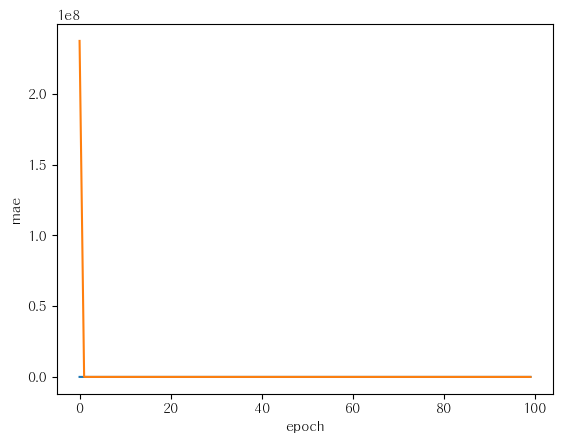

In [30]:
# 학습 100번 가성비 
# 학습을 진행하면서 오차율을 시각화
def sns_hist(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    sns.lineplot(data=hist, x="epoch", y="mae")
    sns.lineplot(data=hist, x="epoch", y="mse")
sns_hist(history)

In [31]:
# model.fit를 수정해서 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 하는 것으로 수정(val_loss기준)
model=build_model()
early_stop=keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
history=model.fit(
    normed_month_df, month_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot(), early_stop]
)
#verbose=0 - log 안 찍는 것


......................

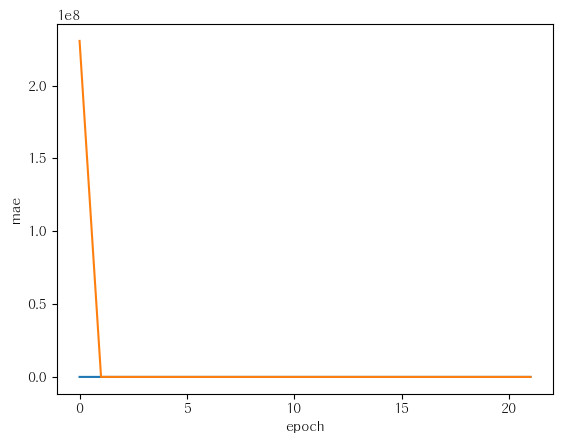

In [32]:
sns_hist(history)

In [33]:
import sys
sys.maxsize

9223372036854775807

In [34]:
# 성능 평가
loss, mae, mse=model.evaluate(normed_predict_df, predict_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: ", mae)
print("테스트 세트의 평균 절대 오차: {:.5f}".format(mae))

474/474 - 0s - loss: 10267.3242 - mae: 75.9546 - mse: 10267.3242 - 186ms/epoch - 391us/step
테스트 세트의 평균 절대 오차:  75.9545669555664
테스트 세트의 평균 절대 오차: 75.95457


In [35]:
# 시각화해서 평가
# 예측만 하게 할 수 있음
predict_predictions=model.predict(normed_predict_df).flatten()
predict_predictions

474/474 [==============================] - 0s 391us/step


array([ 4216.876 ,  8998.731 ,  7728.8623, ...,  7455.499 , 15945.533 ,
       22981.234 ], dtype=float32)

<AxesSubplot:xlabel='총 승객'>

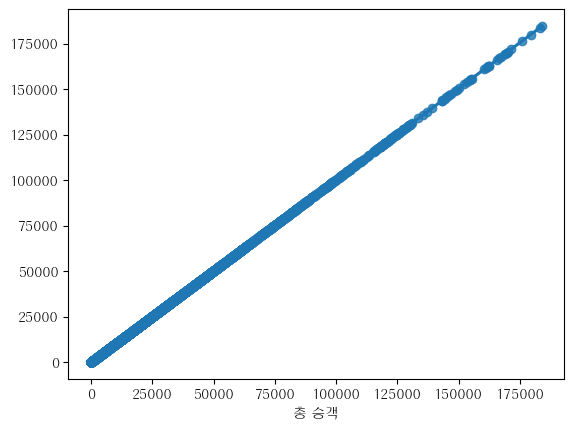

In [36]:
sns.regplot(x=predict_labels, y=predict_predictions)

<AxesSubplot:xlabel='총 승객'>

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


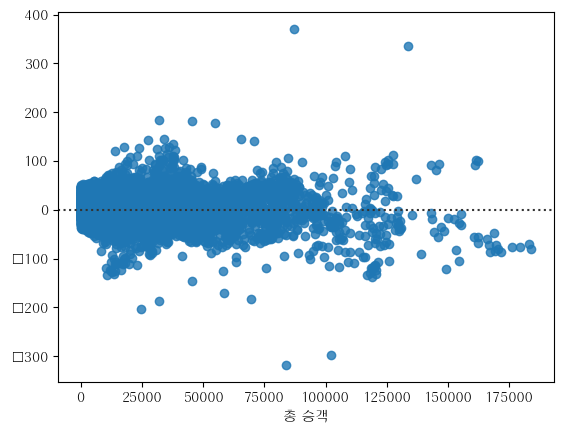

In [37]:
sns.residplot(x=predict_labels, y=predict_predictions)

In [38]:
# 오차 분포
error=predict_predictions-predict_labels
error.tail()

15141    90.54883
15142   188.71484
15143    38.49902
15144    61.53320
15145    83.23438
Name: 총 승객, dtype: float64

<AxesSubplot:>

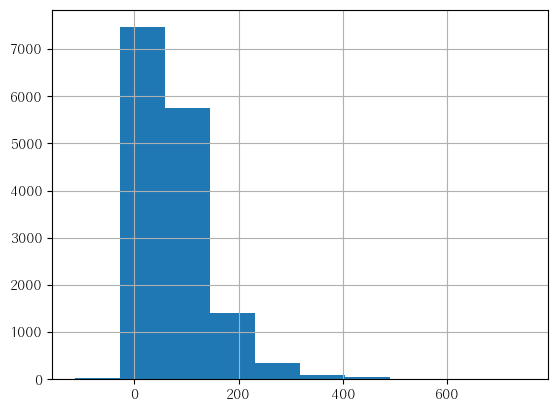

In [39]:
error.hist()

In [40]:
X_train=month_df.drop("승차승객", axis=1)
Y_train=month_df["승차승객"]
X_test=predict_df.drop("승차승객", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((145794, 6), (145794,), (15146, 6))

In [41]:
# k-NN 분류와 회귀에 사용되는 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train, Y_train)*100, 2)
acc_knn

13.37

In [42]:
# 모델에 대한 평가 순위를 매겨서 도출
models=pd.DataFrame({
    "Model":["KNN"],
    "Score":[acc_knn]
    })
models.sort_values(by="Score", ascending=False)

,Model,Score
0,KNN,13.37000


In [43]:
predict_month=pd.DataFrame({
    "승차승객": predict_df["승차승객"],
    "하차승객":Y_pred
    })
predict_month.head()

,승차승객,하차승객
0,2283,2257
1,4697,4681
2,3454,3456
3,4272,4253
4,5741,5652


In [44]:
predict_month.to_csv("predict_month.csv", index=False)